In [46]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv('traffic_data.csv')
df.head()
df

,segment,time,flow,speed
0,21101,00:00:00,31,76
1,21101,00:02:00,30,78
2,21101,00:04:00,31,81
3,21101,00:06:00,32,81
4,21101,00:08:00,40,81
...,...,...,...,...
167581,26209,23:50:00,34,66
167582,26209,23:52:00,31,67
167583,26209,23:54:00,31,62
167584,26209,23:56:00,29,65


In [48]:
df=df.drop_duplicates()
df=df.dropna()
df
##去除空白值和重复值

,segment,time,flow,speed
0,21101,00:00:00,31,76
1,21101,00:02:00,30,78
2,21101,00:04:00,31,81
3,21101,00:06:00,32,81
4,21101,00:08:00,40,81
...,...,...,...,...
167581,26209,23:50:00,34,66
167582,26209,23:52:00,31,67
167583,26209,23:54:00,31,62
167584,26209,23:56:00,29,65


In [87]:
df=df.loc[((df['speed']>=0)&(df['speed']<=150)),:]
df
##删除异常值

,segment,time,flow,speed
0,21101,00:00:00,31,76
1,21101,00:02:00,30,78
2,21101,00:04:00,31,81
3,21101,00:06:00,32,81
4,21101,00:08:00,40,81
...,...,...,...,...
167581,26209,23:50:00,34,66
167582,26209,23:52:00,31,67
167583,26209,23:54:00,31,62
167584,26209,23:56:00,29,65


In [124]:
df_all=df.copy()
df_all.insert(loc=4, column='crash', value=0)
df_all.insert(loc=5, column='timestamp', value=0)
df_all

,segment,time,flow,speed,crash,timestamp
0,21101,00:00:00,31,76,0,0
1,21101,00:02:00,30,78,0,0
2,21101,00:04:00,31,81,0,0
3,21101,00:06:00,32,81,0,0
4,21101,00:08:00,40,81,0,0
...,...,...,...,...,...,...
167581,26209,23:50:00,34,66,0,0
167582,26209,23:52:00,31,67,0,0
167583,26209,23:54:00,31,62,0,0
167584,26209,23:56:00,29,65,0,0


In [82]:

df_crash=pd.read_csv('crash_data.csv')
df_crash

,segment,starttime,endtime
0,21101,15:57:49,16:05:07
1,21104,08:06:38,08:09:16
2,21106,08:52:38,08:55:18
3,21107,12:31:26,12:42:48
4,21108,08:17:09,08:19:47
...,...,...,...
68,24133,16:51:38,16:56:16
69,24206,14:48:20,14:55:21
70,25202,06:52:26,06:58:02
71,26110,15:53:02,15:56:23


In [126]:
for i in range(len(df_crash)):
    df_all["crash"].loc[(df_all["time"]>(df_crash.iloc[i]['starttime'])) & 
                        (df_all['time']<=df_crash.iloc[i]['endtime'])&
                        (df_all['segment']==df_crash.iloc[i]['segment'])] = 1
for i in range(len(df_all)):
    if(df_all.iloc[len(df_all)-1-i]["crash"]==1):
        if(df_all.iloc[len(df_all)-1-i-1]["crash"]==1):
            df_all.iloc[len(df_all)-1-i,4]=-1
df_all=df_all.loc[(df_all["crash"]>=0)]        
df_all["timestamp"]=pd.to_datetime(df_all["time"])
df_all["timestamp"]=df_all["timestamp"].astype("int64") // 10 ** 9
df_all

C:\Users\PC-XR\AppData\Local\Temp\ipykernel_3812\4181140591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["crash"].loc[(df_all["time"]>(df_crash.iloc[i]['starttime'])) &
C:\Users\PC-XR\AppData\Local\Temp\ipykernel_3812\4181140591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["timestamp"]=pd.to_datetime(df_all["time"])
C:\Users\PC-XR\AppData\Local\Temp\ipykernel_3812\4181140591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,segment,time,flow,speed,crash,timestamp
0,21101,00:00:00,31,76,0,1672531200
1,21101,00:02:00,30,78,0,1672531320
2,21101,00:04:00,31,81,0,1672531440
3,21101,00:06:00,32,81,0,1672531560
4,21101,00:08:00,40,81,0,1672531680
...,...,...,...,...,...,...
167581,26209,23:50:00,34,66,0,1672617000
167582,26209,23:52:00,31,67,0,1672617120
167583,26209,23:54:00,31,62,0,1672617240
167584,26209,23:56:00,29,65,0,1672617360


In [141]:
df_a=df_all.loc[(df_all["crash"]>0)]
df_a

,segment,time,flow,speed,crash,timestamp
479,21101,15:58:00,73,16,1,1672588680
2392,21104,08:08:00,133,24,1,1672560480
3854,21106,08:54:00,98,19,1,1672563240
4682,21107,12:32:00,230,30,1,1672576320
5275,21108,08:18:00,54,9,1,1672561080
...,...,...,...,...,...,...
113459,24133,16:08:00,198,24,1,1672589280
113481,24133,16:52:00,174,54,1,1672591920
121340,24206,14:50:00,159,46,1,1672584600
151269,25202,06:54:00,64,27,1,1672556040


In [149]:
x = df_all[['flow','speed']]
y = df_all['crash']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [150]:
log_regression = LogisticRegression()

# 使用训练数据拟合模型
log_regression.fit(x_train, y_train)

# 使用测试数据进行预测
y_pred = log_regression.predict(x_test)


# 输出模型参数
print(log_regression.intercept_, log_regression.coef_, log_regression.score(x_train, y_train))

[-5.32892327] [[ 0.00295041 -0.05716304]] 0.9996116852858594


In [147]:
score = log_regression.score(x_test, y_test) 
score

0.999701296373738

In [151]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
y_predicted = log_regression.predict(x_test)
as_s=accuracy_score(y_test, y_predicted)
f1_s=f1_score(y_test,y_predicted)
print(as_s)
print(f1_s)

0.999701296373738
0.0


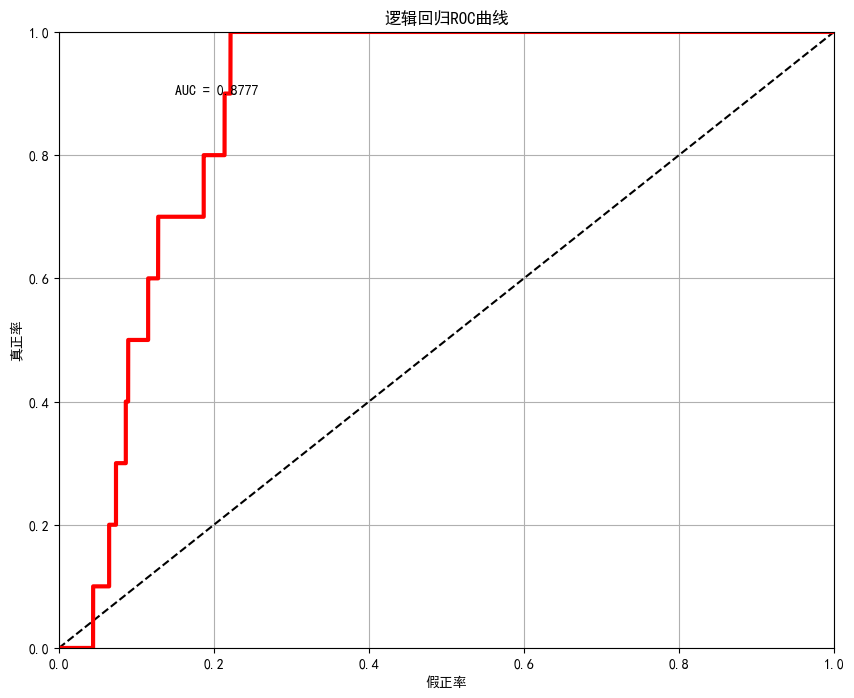

In [152]:
import matplotlib.pyplot as plt
from sklearn.metrics import *

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
pre_y = log_regression.predict_proba(x_test)[:, 1]
fpr_Nb, tpr_Nb, _ = roc_curve(y_test, pre_y)
aucval = auc(fpr_Nb, tpr_Nb)    # 计算auc的取值
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Nb, tpr_Nb,"r",linewidth = 3)
plt.grid()
plt.xlabel("假正率")
plt.ylabel("真正率")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("逻辑回归ROC曲线")
plt.text(0.15,0.9,"AUC = "+str(round(aucval,4)))
plt.show()

In [153]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [154]:

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
y_predicted = clf.predict(x_test)
as_s=accuracy_score(y_test, y_predicted)
f1_s=f1_score(y_test,y_predicted)
print(as_s)
print(f1_s)


0.999701296373738
0.0
